(np.float64(-0.5), np.float64(767.5), np.float64(1023.5), np.float64(-0.5))

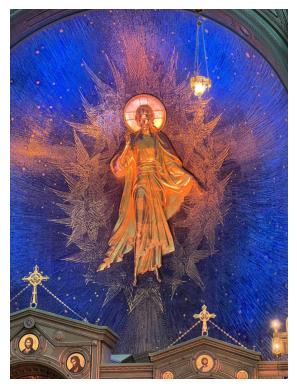

In [41]:
import matplotlib.pyplot as plt

photo = plt.imread('image.jpeg')
plt.imshow(photo)
plt.axis('off')

In [42]:
h, w, c = photo.shape
photo = photo.reshape(h * w, c)

In [43]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
new_image = model.fit_predict(photo)

In [44]:
new_colors = model.cluster_centers_.round(0).astype(int)

(np.float64(-0.5), np.float64(767.5), np.float64(1023.5), np.float64(-0.5))

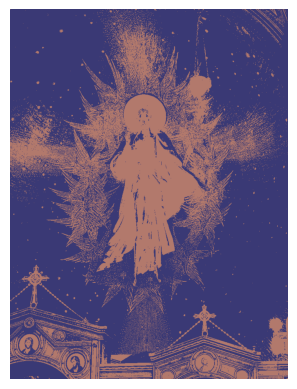

In [45]:
plt.imshow(new_colors[new_image].reshape(h, w, c))
plt.axis('off')

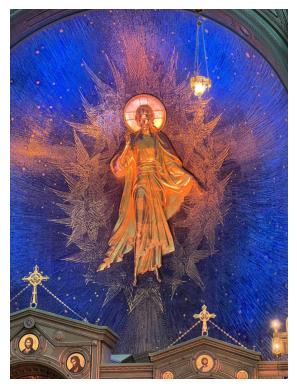

In [46]:
from sklearn.decomposition import PCA
import numpy as np

# X = np.mean(photo.reshape((h, w, c)), -1)
# plt.set_cmap('gray')
plt.axis('off')
plt.imshow(photo.reshape(h, w, c))

In [47]:
photo.shape

(786432, 3)

(1024, 768, 3)


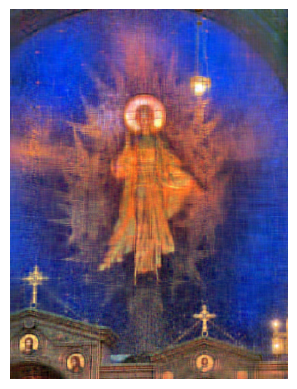

In [56]:
photo = photo.reshape((h, w, c))
X_compressed = np.zeros(photo.shape)

for channel in range(photo.shape[2]):
    U, S, VT = np.linalg.svd(photo[:, :, channel], full_matrices=False)
    S = np.diag(S)

    components = 30
    X_compressed[:, :, channel] = U[:, :components] @ S[0:components, :components] @ VT[:components, :]

#plt.set_cmap('gray')
X_compressed = np.clip(X_compressed, 0, 255).astype(np.uint8)
plt.axis('off')
plt.imshow(X_compressed)
print(X_compressed.shape)